In [ ]:
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
import tensorflow as tf
import keras

In [ ]:
!pip install kaggle

# Make a directory for Kaggle and move the JSON file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the API token
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d rayeed045/american-sign-language-digit-dataset


# Unzip the dataset
dataset_zip = 'american-sign-language-digit-dataset.zip'
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('./data')  # Extract to a folder named 'data'

# List the files in the extracted directory
print(os.listdir('./data'))



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rayeed045/american-sign-language-digit-dataset
License(s): CC0-1.0
100% 287M/288M [00:13<00:00, 22.5MB/s]
100% 288M/288M [00:13<00:00, 21.8MB/s]
['American Sign Language Digits Dataset']


# Exploratory analysis of dataset

In [ ]:
image_path = "data/American Sign Language Digits Dataset/0/Input Images - Sign 0/Sign 0 (1).jpeg"

The shape of the image is (400, 400, 3)


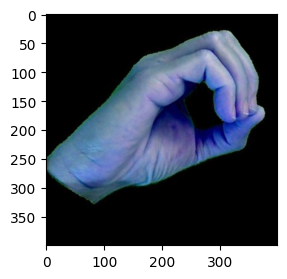

In [ ]:
# Check if the image was loaded successfully
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Could not read image from {image_path}. Check the file path.")
else:
    plt.figure(figsize=(3,3))
    plt.imshow(image)  # Now image should hold a valid numpy array
    #plt.axis('off')
    print("The shape of the image is",image.shape)
    plt.show()


The shape of the image is (400, 400, 3)


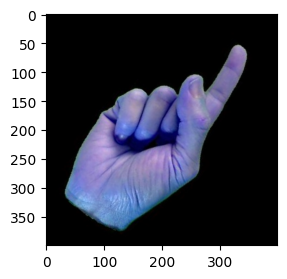

In [ ]:
image = cv2.imread("data/American Sign Language Digits Dataset/1/Input Images - Sign 1/Sign 1 (1).jpeg")
plt.figure(figsize=(3,3))
plt.imshow(image)
#plt.axis('off')
print("The shape of the image is",image.shape)
plt.show()

### Both image has different dimension. our image has different shape i.e (100,98,3) and (100,75,3).

## Step 2 : creating dataframe from the dataset.


In [ ]:
DIRECTORY = 'data/American Sign Language Digits Dataset'

In [ ]:
CATEGORIES = ["0","1",'2',"3","4","5",'6',"7","8","9"]

In [ ]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category,f"Input Images - Sign {category}")
    for img in os.listdir(path):
        print(path)
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (90, 90))
        data.append([new_arr, label])

data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Sign 0
data/American Sign Language Digits Dataset/0/Input Images - Si

In [ ]:
print( 'total length of data is :', len(data))

total length of data is : 5000


In [ ]:
data[4500]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 9]

In [ ]:
random.shuffle(data)

In [ ]:
a=[]
b=[]
for feature,label in data:
  a.append(feature)
  b.append(label)

In [ ]:
a=np.array(a)
b=np.array(b)

In [ ]:
# with open('/content/mydrive/MyDrive/dataset/a', 'wb') as f:
#   pickle.dump(a,f)

In [ ]:
# with open('/content/mydrive/MyDrive/dataset/b', 'wb') as f:
#   pickle.dump(b,f)

In [ ]:
# with open('/content/mydrive/MyDrive/dataset/b', 'rb') as f:
#   y = pickle.load(f)


In [ ]:
x = a
y = b

In [ ]:
b[800]

9

In [ ]:
# with open('/content/mydrive/MyDrive/dataset/a', 'rb') as f:
#   x = pickle.load(f)

In [ ]:
#pickle.dump(a, open('a.pkl', 'wb'))
#pickle.dump(b, open('b.pkl', 'wb'))

In [ ]:
#X = pickle.load(open('a.pkl', 'rb'))
#y = pickle.load(open('b.pkl', 'rb'))

In [ ]:
print(x[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
x[0].shape

(90, 90)

In [ ]:
x=x/255

In [ ]:
x[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
X_train[0].shape

(90, 90)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()

# CNN Layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(90, 90, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and reduce dense layer complexity
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer


model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 88, 88, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 44, 44, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7056)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         225,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,634 (893.10 KB)

 Trainable params: 228,634 (893.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", #validation loss doesn’t improve for 5 epochs to prevent overfitting.
    patience=5,
    restore_best_weights=True)

In [ ]:
r = model.fit(X_train, y_train, epochs=5 ,batch_size=32, validation_split=0.25,callbacks=[call])

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.1437 - loss: 2.2730 - val_accuracy: 0.4606 - val_loss: 2.0402
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3371 - loss: 1.9548 - val_accuracy: 0.7004 - val_loss: 1.4874
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4787 - loss: 1.5487 - val_accuracy: 0.8166 - val_loss: 1.0532
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5724 - loss: 1.2839 - val_accuracy: 0.8358 - val_loss: 0.8285
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6344 - loss: 1.0631 - val_accuracy: 0.8827 - val_loss: 0.6479


In [ ]:
cnn_history = r

In [ ]:
#CNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm  # Import tqdm for progress bar
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate model performance
def evaluate_model(model, x_test, y_test, categories):
    y_preds = []  # Predicted labels
    y_true = []   # True labels

    # Progress bar added using tqdm
    print("Evaluating model on test dataset...")
    for i in tqdm(range(len(x_test)), desc="Processing Images", unit="image"):
        image = x_test[i]
        image = np.expand_dims(image, axis=0)
        pred_value = model.predict(image, verbose=0)
        y_pred = np.argmax(pred_value)  # Predicted label
        y_preds.append(y_pred)
        y_true.append(y_test[i])  # True label

    # Metrics Calculation
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    f1 = f1_score(y_true, y_preds, average='weighted')
    print("\nEvaluation Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_true, y_preds, target_names=categories))

    return accuracy, precision, recall, f1

# Example usage:
# Assuming x_test and y_test are loaded and preprocessed properly, and model is trained
# x_test shape: (num_samples, 90, 90)
# y_test shape: (num_samples,)

# Categories of labels
CATEGORIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Replace with your actual categories

# Call the evaluation function
cnn_accuracy, cnn_precision, cnn_recall, cnn_f1 = evaluate_model(model, X_test, y_test, CATEGORIES)

# Test a single image prediction


Evaluating model on test dataset...


Processing Images: 100%|██████████| 1250/1250 [01:09<00:00, 17.98image/s]


Evaluation Metrics:
Accuracy: 0.9016
Precision: 0.904822375237236
Recall: 0.9016
F1 Score: 0.9017488051308382

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.98      0.97      0.97       127
           2       0.94      0.98      0.96       124
           3       0.97      0.93      0.94       120
           4       0.75      0.89      0.81       128
           5       0.87      0.92      0.89       118
           6       0.87      0.88      0.88       127
           7       0.84      0.73      0.78       122
           8       0.91      0.83      0.87       126
           9       0.95      0.93      0.94       138

    accuracy                           0.90      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.90      0.90      0.90      1250



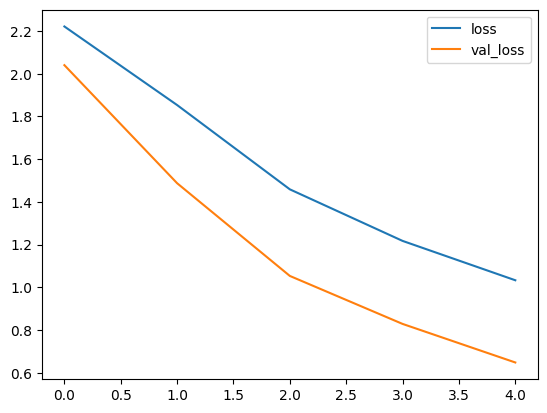

In [ ]:
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

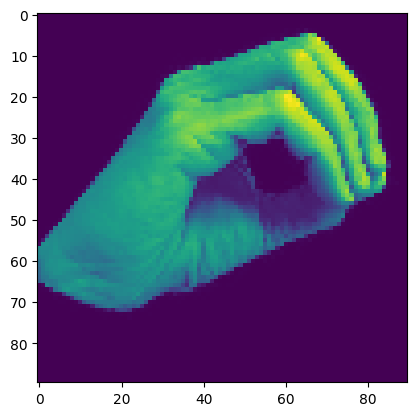

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
0


In [ ]:
image=X_test[0]
plt.imshow(image)
plt.show()

np_image = np.expand_dims(image, axis=0)
pred_value = model.predict(np_image)
y = np.argmax(pred_value)
word = CATEGORIES[y]
print(word)

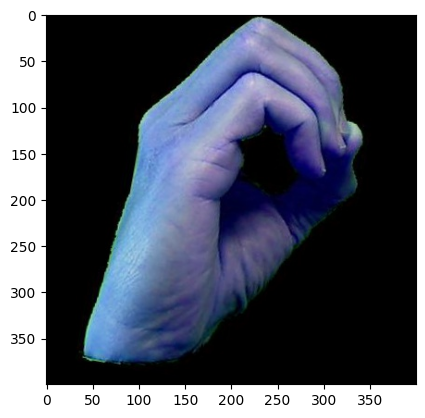

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0


In [ ]:
# make a prediction for a new image.
def Image_Prediction(file):
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_arr = cv2.resize(image, (90, 90))
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image
image = Image_Prediction('data/American Sign Language Digits Dataset/0/Input Images - Sign 0/Sign 0 (103).jpeg')
pred_value = model.predict(image)
y = np.argmax(pred_value)
word = CATEGORIES[y]
print(word)

## MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load the MobileNetV2 model with pre-trained weights, excluding the top layers
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(90, 90, 3))

#ImageNet dataset (which has 1,000 classes, like "cat" and "dog").

# Freeze the convolutional layers
for layer in mobilenet_base.layers: # Prevents the pre-trained layers from updating their weights during training
    layer.trainable = False         #Transfer Learning

# Build the model
model_mobilenet = Sequential([
    Input(shape=(90, 90, 1)),  # Input layer for grayscale images
    tf.keras.layers.Conv2D(3, (3, 3), padding='same', activation='relu'),  # Convert to 3 channels
    mobilenet_base,
    Flatten(), # multi-dimensional feature maps from MobileNetV2 into a single vector -> Fully Connected Layers
    Dense(128, activation='relu'),  # relu - Ensures non-linearity to help the model learn complex patterns. #Fully connected layer
    Dropout(0.2), # Dropout layer to prevent overfitting by randomly turning off 20% of neurons during training.
    Dense(23, activation='softmax')  # Ensures the probabilities sum to 1, making it suitable for multi-class classification.
])

# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), #Adjusts model weights during each iteration of training. #Controls the step size for weight updates (small to ensure gradual improvement).
                        loss='sparse_categorical_crossentropy', #A loss function for multi-class classification where labels are integers
                        metrics=['accuracy']) #calculates how different the predicted probabilities are from the actual labels.

model_mobilenet.summary()


<ipython-input-25-a0730c7f5eeb>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(90, 90, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 11520)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 23)                  │           2,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,735,669 (14.25 MB)

 Trainable params: 1,477,685 (5.64 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
r_mob = model_mobilenet.fit(X_train, y_train, epochs=5 ,batch_size=32, validation_split=0.25,callbacks=[call]) #batch_size: Number of samples processed before updating the model’s weights.

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.3802 - loss: 2.3216 - val_accuracy: 0.8348 - val_loss: 0.5562
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8218 - loss: 0.6191 - val_accuracy: 0.8987 - val_loss: 0.3227
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9075 - loss: 0.3327 - val_accuracy: 0.9403 - val_loss: 0.2078
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9219 - loss: 0.2526 - val_accuracy: 0.9478 - val_loss: 0.1867
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9445 - loss: 0.1853 - val_accuracy: 0.9627 - val_loss: 0.1293


In [ ]:
mobilenet_history = r_mob

In [ ]:
# Mobile Net
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm  # Import tqdm for progress bar
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Function to evaluate model performance
def evaluate_model(model, x_test, y_test, categories):
    y_preds = []  # Predicted labels
    y_true = []   # True labels

    # Progress bar added using tqdm
    print("Evaluating model on test dataset...")
    for i in tqdm(range(len(x_test)), desc="Processing Images", unit="image"):
        image = x_test[i]
        image = np.expand_dims(image, axis=0)  # Add batch dimension designed to process inputs in batches
                                               # Processing multiple inputs at once (batch processing) is computationally efficient
        pred_value = model_mobilenet.predict(image, verbose=0)
        y_pred = np.argmax(pred_value)  # Predicted label
        y_preds.append(y_pred)
        y_true.append(y_test[i])  # True label

    # Metrics Calculation
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    f1 = f1_score(y_true, y_preds, average='weighted')
    print("\nEvaluation Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_true, y_preds, target_names=categories))

    return accuracy, precision, recall, f1

# Example usage:
# Assuming x_test and y_test are loaded and preprocessed properly, and model is trained
# x_test shape: (num_samples, 90, 90)
# y_test shape: (num_samples,)

# Categories of labels
CATEGORIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Replace with your actual categories

# Call the evaluation function
mobilenet_accuracy, mobilenet_precision, mobilenet_recall, mobilenet_f1 = evaluate_model(model, X_test, y_test, CATEGORIES)

# Test a single image prediction


Evaluating model on test dataset...


Processing Images: 100%|██████████| 1250/1250 [01:15<00:00, 16.59image/s]


Evaluation Metrics:
Accuracy: 0.8032
Precision: 0.8389259457084083
Recall: 0.8032
F1 Score: 0.7960500069513563

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       0.79      0.97      0.87       127
           2       0.88      0.87      0.87       147
           3       0.97      0.79      0.87       120
           4       0.65      0.78      0.71       112
           5       0.93      0.95      0.94       130
           6       0.85      0.68      0.75       122
           7       0.97      0.28      0.44       120
           8       0.52      0.83      0.64       129
           9       0.82      0.83      0.83       119

    accuracy                           0.80      1250
   macro avg       0.84      0.80      0.79      1250
weighted avg       0.84      0.80      0.80      1250



In [ ]:
#accuracy_score: Measures the percentage of correctly predicted labels.

#precision_score: Measures how many predicted positive classes were actually correct.

#recall_score: Measures how many actual positive classes were correctly predicted.

#f1_score: A harmonic mean of precision and recall. It balances false positives and false negatives.

#average='weighted': Calculates metrics for each class and weighs them by the number of samples in each class.

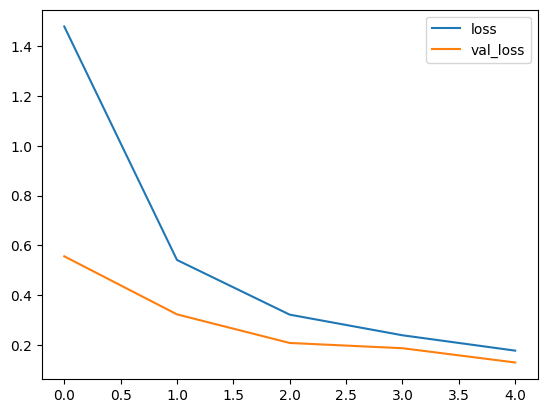

In [ ]:
# plotting the loss and validation loss of the model
plt.plot(r_mob.history['loss'], label='loss')
plt.plot(r_mob.history['val_loss'], label = 'val_loss')
plt.legend()

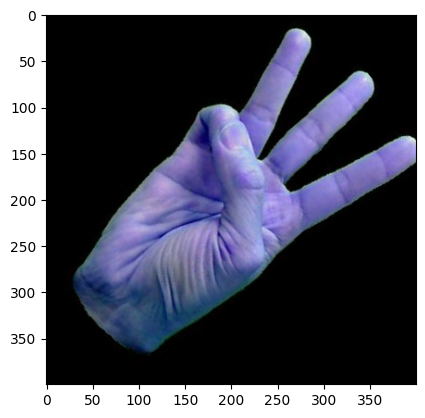

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
6


In [ ]:
# make a prediction for a new image.
def Image_Prediction(file):
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_arr = cv2.resize(image, (90, 90))
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image
image = Image_Prediction('data/American Sign Language Digits Dataset/6/Input Images - Sign 6/Sign 6 (10).jpeg')
pred_value = model_mobilenet.predict(image)
y = np.argmax(pred_value)
word = CATEGORIES[y]
print(word)

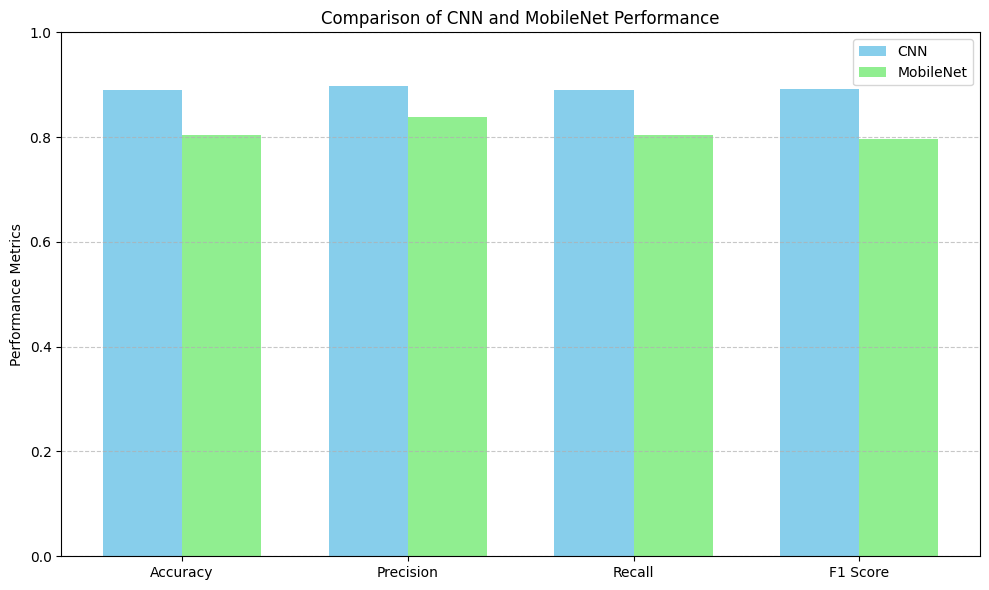

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

 # Organize metrics into lists for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1]
mobilenet_values = [mobilenet_accuracy, mobilenet_precision, mobilenet_recall, mobilenet_f1]

# Bar graph settings
x = np.arange(len(metrics))  # X-axis positions
width = 0.35  # Width of bars

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cnn_values, width, label='CNN', color='skyblue')
plt.bar(x + width/2, mobilenet_values, width, label='MobileNet', color='lightgreen')

# Add labels, title, and legend
plt.ylabel('Performance Metrics')
plt.title('Comparison of CNN and MobileNet Performance')
plt.xticks(x, metrics)  # Set X-axis labels
plt.ylim(0, 1.0)  # Metrics range from 0 to 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()

## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, GlobalAveragePooling2D, Dense, Dropout, Input
)
from tensorflow.keras.optimizers import Adam

# Load the VGG19 model with pre-trained weights, excluding the top layers
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(90, 90, 3))

# Freeze the convolutional layers
for layer in vgg19_base.layers:
    layer.trainable = False

# Build the model
model_vgg19 = Sequential([
    Input(shape=(90, 90, 1)),  # Input layer for grayscale images
    Conv2D(3, (3, 3), padding='same', activation='relu'),  # Convert to 3 channels
    vgg19_base,
    GlobalAveragePooling2D(), #Reduces spatial dimensions of the feature maps
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model_vgg19.compile(
    optimizer=Adam(learning_rate=0.0001),  # Use a small learning rate
    loss='sparse_categorical_crossentropy', # multi-class classification -> labels are integers(not 1-hot encoded vectors)
    metrics=['accuracy']
)

model_vgg19.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 2, 2, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,029,544 (76.41 MB)

 Trainable params: 5,160 (20.16 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
r_vgg19 = model_vgg19.fit(X_train, y_train, epochs=5 ,batch_size=32, validation_split=0.25)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.8094 - loss: 1.3419 - val_accuracy: 0.8070 - val_loss: 1.3027
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.8202 - loss: 1.2907 - val_accuracy: 0.8102 - val_loss: 1.2594
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.8268 - loss: 1.2272 - val_accuracy: 0.8273 - val_loss: 1.2196
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8168 - loss: 1.2083 - val_accuracy: 0.8316 - val_loss: 1.1818
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8406 - loss: 1.1673 - val_accuracy: 0.8401 - val_loss: 1.1471


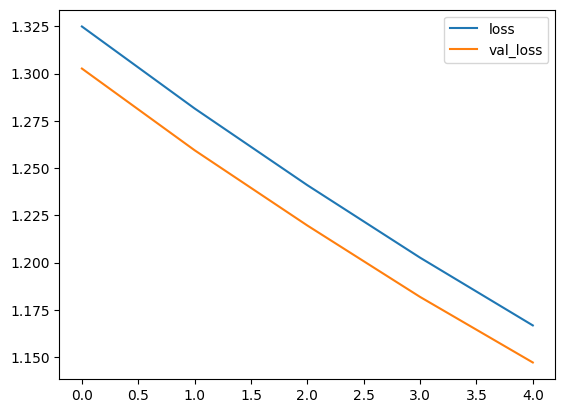

In [ ]:
# plotting the loss and validation loss of the model
plt.plot(r_vgg19.history['loss'], label='loss')
plt.plot(r_vgg19.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
#VGG-19
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm  # Import tqdm for progress bar
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate model performance
def evaluate_model(model, x_test, y_test, categories):
    y_preds = []  # Predicted labels
    y_true = []   # True labels

    # Progress bar added using tqdm
    print("Evaluating model on test dataset...")
    for i in tqdm(range(len(x_test)), desc="Processing Images", unit="image"):
        image = x_test[i]
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        pred_value = model_vgg19.predict(image, verbose=0)
        y_pred = np.argmax(pred_value)  # Predicted label
        y_preds.append(y_pred)
        y_true.append(y_test[i])  # True label

    # Metrics Calculation
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    f1 = f1_score(y_true, y_preds, average='weighted')
    print("\nEvaluation Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_true, y_preds, target_names=categories))

    return accuracy, precision, recall, f1

# Example usage:
# Assuming x_test and y_test are loaded and preprocessed properly, and model is trained
# x_test shape: (num_samples, 90, 90)
# y_test shape: (num_samples,)

# Categories of labels
CATEGORIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Replace with your actual categories

# Call the evaluation function
vgg19_accuracy, vgg19_precision, vgg19_recall, vgg19_f1 = evaluate_model(model_vgg19, X_test, y_test, CATEGORIES)

# Test a single image prediction


Evaluating model on test dataset...


Processing Images: 100%|██████████| 1250/1250 [01:23<00:00, 14.90image/s]


Evaluation Metrics:
Accuracy: 0.812
Precision: 0.8140697071995718
Recall: 0.812
F1 Score: 0.8093405564412965

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       0.85      0.97      0.91       117
           2       0.76      0.83      0.79       120
           3       0.86      0.85      0.85       145
           4       0.84      0.74      0.79       117
           5       0.98      0.97      0.97       137
           6       0.70      0.74      0.72       129
           7       0.66      0.84      0.73       116
           8       0.68      0.52      0.59       132
           9       0.81      0.67      0.73       124

    accuracy                           0.81      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.81      0.81      0.81      1250



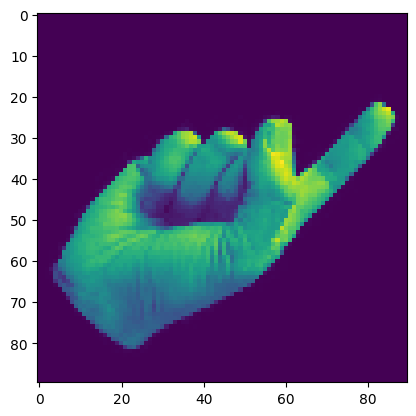

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1


In [ ]:
image=X_test[2]
plt.imshow(image)
plt.show()

np_image = np.expand_dims(image, axis=0)
pred_value = model_vgg19.predict(np_image)
y = np.argmax(pred_value)
word = CATEGORIES[y]
print(word)

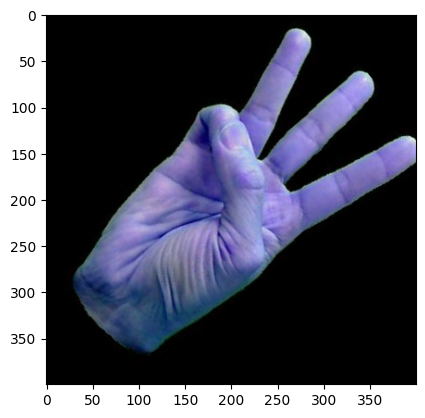

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1


In [ ]:
# make a prediction for a new image.
def Image_Prediction(file):
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_arr = cv2.resize(image, (90, 90))
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image
image = Image_Prediction('data/American Sign Language Digits Dataset/6/Input Images - Sign 6/Sign 6 (10).jpeg')
pred_value = model_vgg19.predict(image)
y = np.argmax(pred_value)
word = CATEGORIES[y]
print(word)

## Hybrid Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape

# Define the CNN part of the model
model_lstm = Sequential()

# CNN Layers
model_lstm.add(Conv2D(12, kernel_size=(3,3), activation='relu', input_shape=(90, 90, 1)))
model_lstm.add(MaxPooling2D(pool_size=(2,2)))

model_lstm.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_lstm.add(MaxPooling2D(pool_size=(2,2)))

model_lstm.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model_lstm.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the CNN output
model_lstm.add(Flatten()) # Converts the 3D feature maps (11x11x256) into a 1D array for further processing

# Compute valid reshaping dimensions (20736 = 36 * 576)
model_lstm.add(Reshape((36, 576)))  # LSTM reshaped to represent a sequence of 36 "time steps," where each step has 576 features.

# Add LSTM layers to capture sequential patterns
model_lstm.add(LSTM(128, return_sequences=True, activation='tanh')) ## LSTMs are designed to capture sequential dependencies (e.g., the progression of gestures over time).
model_lstm.add(LSTM(32, activation='tanh')) # return_sequences=True; Outputs the full sequence for the next LSTM layer
                                             # Reduces the sequence to a single vector with 32 features.


# Fully Connected Layers
model_lstm.add(Dense(10, activation='softmax')) #Fully connected layer with 10 output neurons, corresponding to 10 classes.

# Summary
model_lstm.summary()
model_lstm.compile(optimizer="Adam",
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 88, 88, 12)          │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 44, 44, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 32)          │           3,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 19, 19, 256)         │          73,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 36, 576)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 36, 128)             │         360,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 459,490 (1.75 MB)

 Trainable params: 459,490 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
r_lstm = model_lstm.fit(X_train, y_train, epochs=5 ,batch_size=32, validation_split=0.25)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.1774 - loss: 2.1775 - val_accuracy: 0.4051 - val_loss: 1.6366
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4958 - loss: 1.3681 - val_accuracy: 0.6514 - val_loss: 1.0739
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7210 - loss: 0.8194 - val_accuracy: 0.8443 - val_loss: 0.4909
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8521 - loss: 0.4666 - val_accuracy: 0.8849 - val_loss: 0.3384
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9070 - loss: 0.3216 - val_accuracy: 0.9243 - val_loss: 0.2899


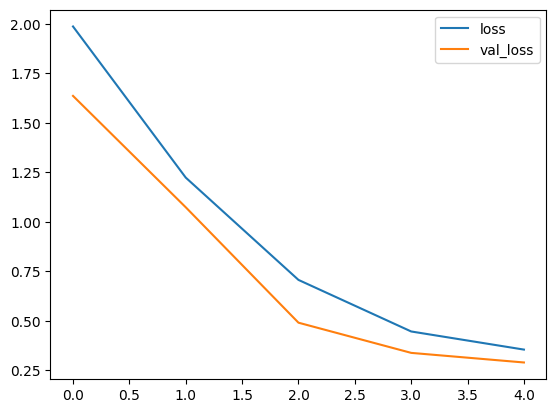

In [ ]:
# plotting the loss and validation loss of the model
plt.plot(r_lstm.history['loss'], label='loss')
plt.plot(r_lstm.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
#Hybrid Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm  # Import tqdm for progress bar
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate model performance
def evaluate_model(model, x_test, y_test, categories):
    y_preds = []  # Predicted labels
    y_true = []   # True labels

    # Progress bar added using tqdm
    print("Evaluating model on test dataset...")
    for i in tqdm(range(len(x_test)), desc="Processing Images", unit="image"):
        image = x_test[i]
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        pred_value = model_lstm.predict(image, verbose=0)
        y_pred = np.argmax(pred_value)  # Predicted label
        y_preds.append(y_pred)
        y_true.append(y_test[i])  # True label

    # Metrics Calculation
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    f1 = f1_score(y_true, y_preds, average='weighted')
    print("\nEvaluation Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_true, y_preds, target_names=categories))

    return accuracy, precision, recall, f1

# Example usage:
# Assuming x_test and y_test are loaded and preprocessed properly, and model is trained
# x_test shape: (num_samples, 90, 90)
# y_test shape: (num_samples,)

# Categories of labels
CATEGORIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Replace with your actual categories

# Call the evaluation function
lstm_accuracy, lstm_precision, lstm_recall, lstm_f1 = evaluate_model(model_lstm, X_test, y_test, CATEGORIES)

# Test a single image prediction


Evaluating model on test dataset...


Processing Images: 100%|██████████| 1250/1250 [01:09<00:00, 17.94image/s]


Evaluation Metrics:
Accuracy: 0.9184
Precision: 0.9221300552895738
Recall: 0.9184
F1 Score: 0.9185915200474561

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       113
           1       1.00      0.98      0.99       117
           2       0.98      0.99      0.98       120
           3       0.91      0.92      0.92       145
           4       0.76      0.92      0.83       117
           5       0.96      0.94      0.95       137
           6       0.93      0.98      0.95       129
           7       0.91      0.78      0.84       116
           8       0.83      0.84      0.83       132
           9       0.95      0.83      0.89       124

    accuracy                           0.92      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.92      0.92      0.92      1250



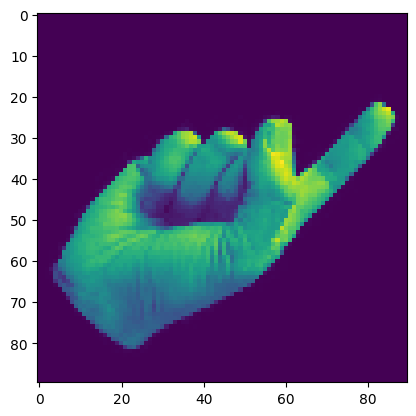

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1


In [ ]:
image=X_test[2]
plt.imshow(image)
plt.show()

np_image = np.expand_dims(image, axis=0)
pred_value = model_lstm.predict(np_image)
y = np.argmax(pred_value)
word = CATEGORIES[y]
print(word)

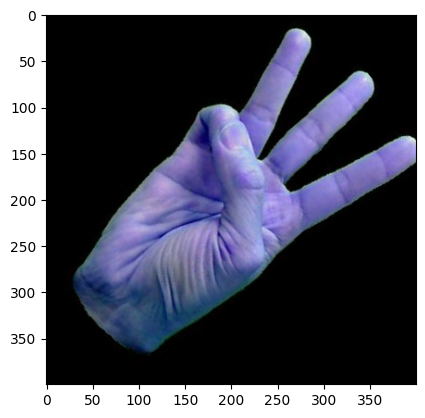

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6


In [ ]:
# make a prediction for a new image.
def Image_Prediction(file):
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_arr = cv2.resize(image, (90, 90))
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image
image = Image_Prediction('data/American Sign Language Digits Dataset/6/Input Images - Sign 6/Sign 6 (10).jpeg')
pred_value = model_lstm.predict(image)
y = np.argmax(pred_value)
word = CATEGORIES[y]
print(word)